# Project Question : Analysis of the Coursera dataset to provide insights 
## Data Source : https://www.kaggle.com/datasets/siddharthm1698/coursera-course-dataset

Problem : Organization and course perfomances

# Data Ingestion 
Use of necessary libraries to perform load the dataset and perform a preview

In [3]:
import pandas as pd

course_data = pd.read_csv('coursea_data.csv')

course_data.head()

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5.3k
1,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17k
2,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130k
3,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91k
4,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320k


## Data Cleaning and Exploratory
data cleaning and exploratory analysis by checking for missing values, data types, and necessary transformations

In [ ]:

course_data.shape

(891, 6)

In [ ]:

course_data.tail()

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
886,Программирование на Python,Mail.Ru Group,SPECIALIZATION,4.5,Intermediate,52k
887,Психолингвистика (Psycholinguistics),Saint Petersburg State University,COURSE,4.8,Mixed,21k
888,Разработка интерфейсов: вёрстка и JavaScript,E-Learning Development Fund,SPECIALIZATION,4.5,Intermediate,30k
889,Русский как иностранный,Saint Petersburg State University,SPECIALIZATION,4.6,Intermediate,9.8k
890,Финансовые инструменты для частного инвестора,National Research University Higher School of ...,SPECIALIZATION,4.7,Beginner,38k


Removal of non ASCII characetrs since I am focusing on English courses

In [ ]:

columns_to_check = ['course_title', 'course_organization']  
course_data = course_data[course_data[columns_to_check].applymaplambda x: x.isascii()).all(axis=1)](


course_data.tail()

/var/folders/rd/jz5wyqfd2f33y9td2_gm_r9w0000gn/T/ipykernel_53536/1801663716.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  course_data = course_data[course_data[columns_to_check].applymap(lambda x: x.isascii()).all(axis=1)]


,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
869,Write Professional Emails in English,Georgia Institute of Technology,COURSE,4.7,Mixed,270k
870,Write Your First Novel,Michigan State University,COURSE,4.4,Beginner,18k
871,Writing in the Sciences,Stanford University,COURSE,4.9,Beginner,140k
872,e-Learning Ecologies: Innovative Approaches to...,University of Illinois at Urbana-Champaign,COURSE,4.5,Mixed,17k
873,iOS App Development with Swift,University of Toronto,SPECIALIZATION,3.9,Intermediate,76k


Checking for missing values

In [8]:
missing_values = course_data.isnull().sum()
missing_values

course_title                0
course_organization         0
course_Certificate_type     0
course_rating               0
course_difficulty           0
course_students_enrolled    0
dtype: int64

In [ ]:
summary = course_data.describe(include='all')

summary

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
count,789,789,789,789.000000,789,789
unique,787,136,3,NaN,4,198
top,Developing Your Musicianship,University of Pennsylvania,COURSE,NaN,Beginner,120k
freq,2,58,512,NaN,432,20
mean,NaN,NaN,NaN,4.671736,NaN,NaN
std,NaN,NaN,NaN,0.164871,NaN,NaN
min,NaN,NaN,NaN,3.300000,NaN,NaN
25%,NaN,NaN,NaN,4.600000,NaN,NaN
50%,NaN,NaN,NaN,4.700000,NaN,NaN
75%,NaN,NaN,NaN,4.800000,NaN,NaN


`course_students_enrolled`  conversion to numerical features for easier reading of values

In [ ]:
def normalize_enrollment(enrollment):
    if isinstance(enrollment, str):
        if 'k' in enrollment:
            return float(enrollment.replace('k', '').strip()) * 1000
        elif 'm' in enrollment:
            return float(enrollment.replace('m', '').strip()) * 1000000
        else:
            return float(enrollment)
    elif pd.isna(enrollment):  
        return enrollment
    else:
        return float(enrollment) 


course_data['course_students_enrolled'] = course_data['course_students_enrolled'].apply(normalize_enrollment)


cleaned_head = course_data.head()

cleaned_head


,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
1,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17000.0
2,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130000.0
3,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91000.0
4,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320000.0
5,ADHD: Everyday Strategies for Elementary Students,University at Buffalo,COURSE,4.7,Beginner,39000.0


In [ ]:
summary = course_data.describe(include='all')


summary

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
count,789,789,789,789.000000,789,7.890000e+02
unique,787,136,3,NaN,4,NaN
top,Developing Your Musicianship,University of Pennsylvania,COURSE,NaN,Beginner,NaN
freq,2,58,512,NaN,432,NaN
mean,NaN,NaN,NaN,4.671736,NaN,9.428999e+04
std,NaN,NaN,NaN,0.164871,NaN,1.908368e+05
min,NaN,NaN,NaN,3.300000,NaN,1.600000e+03
25%,NaN,NaN,NaN,4.600000,NaN,1.800000e+04
50%,NaN,NaN,NaN,4.700000,NaN,4.300000e+04
75%,NaN,NaN,NaN,4.800000,NaN,1.100000e+05


In [12]:
course_data.head()

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
1,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17000.0
2,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130000.0
3,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91000.0
4,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320000.0
5,ADHD: Everyday Strategies for Elementary Students,University at Buffalo,COURSE,4.7,Beginner,39000.0


# Exploratory Data Analysis (EDA) AND Visualization
Use of visuals to give meaningful insights

# Creating a histogram to visualize the distribution of course ratings frequency


The plot shows the distribution of course ratings, which appears to be centered around 4.5 to 4.8, indicating a generally high level of satisfaction among students.

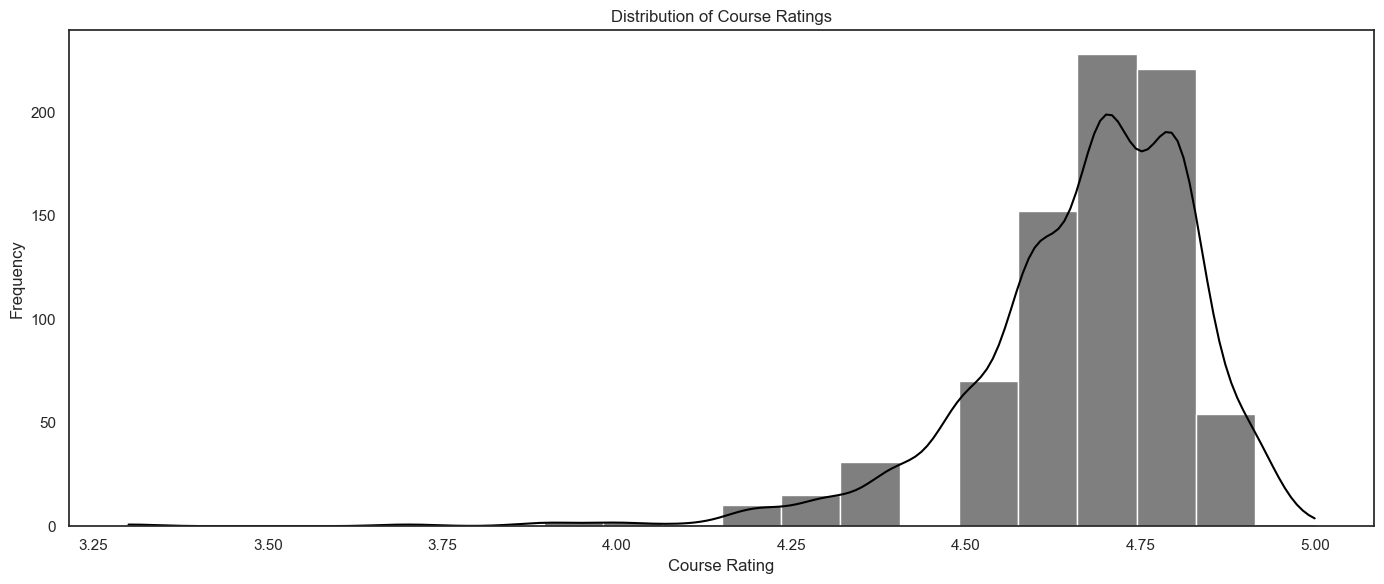

In [14]:
plt.figure(figsize=(14, 6))
sns.histplot(course_data['course_rating'], bins=20, kde=True, color='black')
plt.title('Distribution of Course Ratings')
plt.xlabel('Course Rating')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

 Relationship between course difficulty and ratings, as well as the average number of students enrolled per difficulty level. 

In [ ]:

difficulty_analysis = course_data.groupby('course_difficulty').agg(
    average_rating=('course_rating', 'mean'),
    average_enrollment=('course_students_enrolled', 'mean')
).reset_index()


difficulty_analysis

,course_difficulty,average_rating,average_enrollment
0,Advanced,4.600000,66547.368421
1,Beginner,4.675231,86189.583333
2,Intermediate,4.640116,75140.116279
3,Mixed,4.703614,138387.951807


### Scatter plot for average rating and enrollment by difficulty

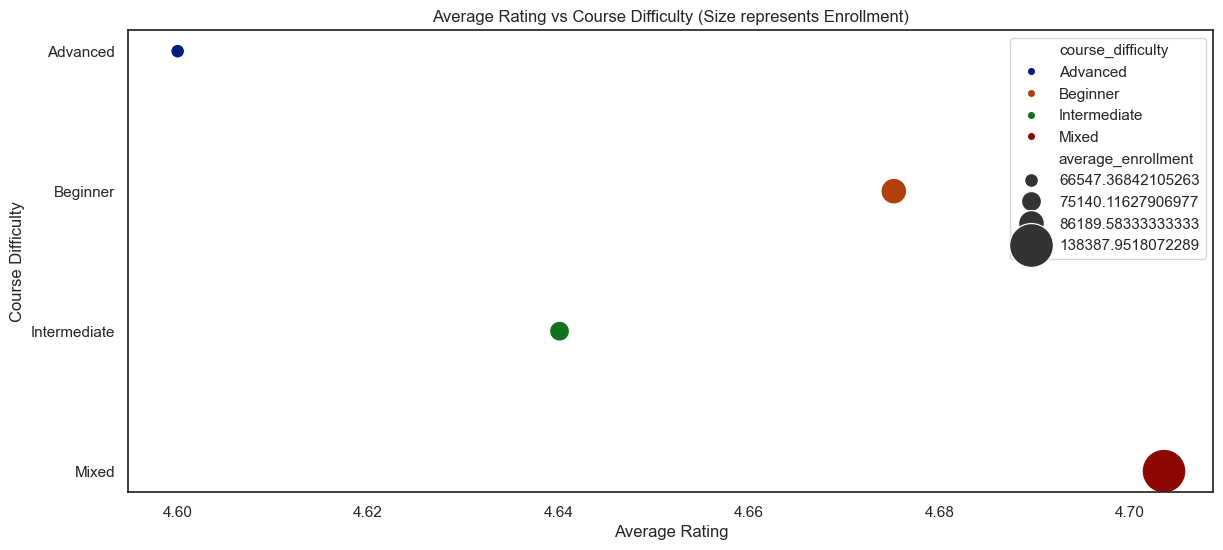

In [ ]:

plt.figure(figsize=(14, 6))
sns.scatterplot(
    data=difficulty_analysis,
    x='average_rating',
    y='course_difficulty',
    size='average_enrollment',
    sizes=(100, 1000),
    hue='course_difficulty',
    palette='dark',
    legend=True  
)
plt.title('Average Rating vs Course Difficulty (Size represents Enrollment)')
plt.xlabel('Average Rating')
plt.ylabel('Course Difficulty')
plt.show()


# Number of courses available for each difficulty level


/var/folders/rd/jz5wyqfd2f33y9td2_gm_r9w0000gn/T/ipykernel_53536/3810622401.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='course_difficulty', data=course_data, order=difficulty_order, palette='magma')


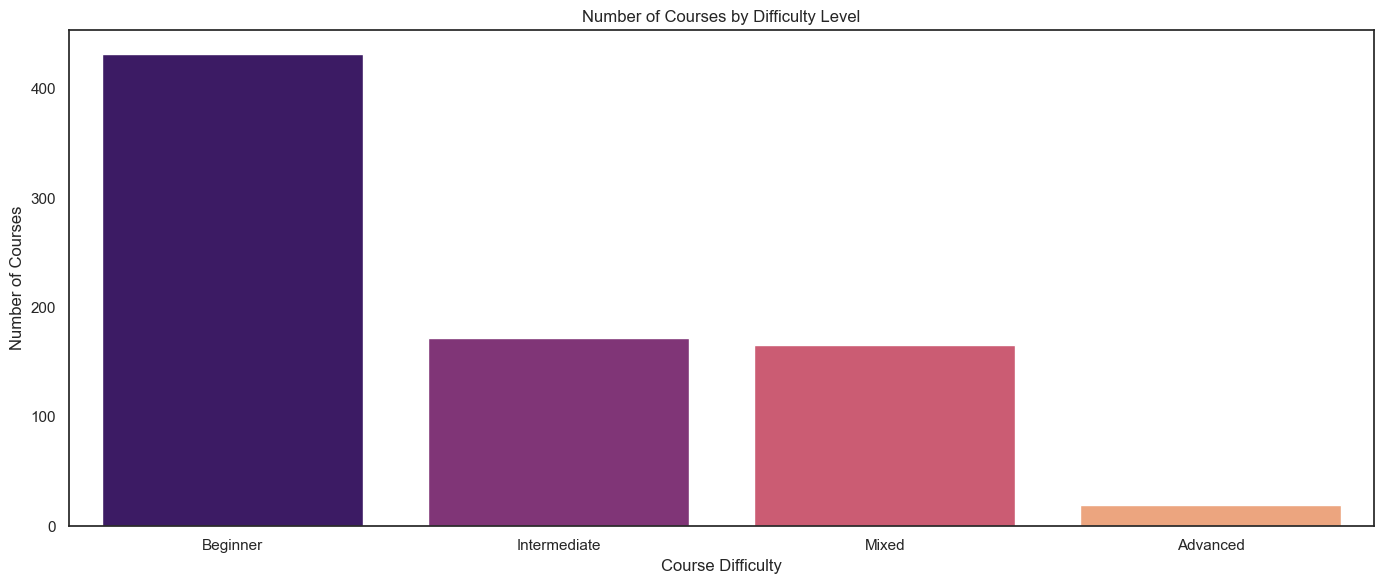

In [ ]:

difficulty_order = course_data['course_difficulty'].value_counts().index

plt.figure(figsize=(14, 6))
sns.countplot(x='course_difficulty', data=course_data, order=difficulty_order, palette='magma')
plt.title('Number of Courses by Difficulty Level')
plt.xlabel('Course Difficulty')
plt.ylabel('Number of Courses')
plt.tight_layout()
plt.show()

Point : Many courses offered are of begginner level with the very least being Advanced thus this creates a condusive environment for many people to join 

## Average Rating by Certificate Type and Difficulty Level
This heatmap can show the relationship between certificate type, course difficulty, and average rating. It gives insight into which difficulty levels and certificate types tend to have higher or lower ratings.

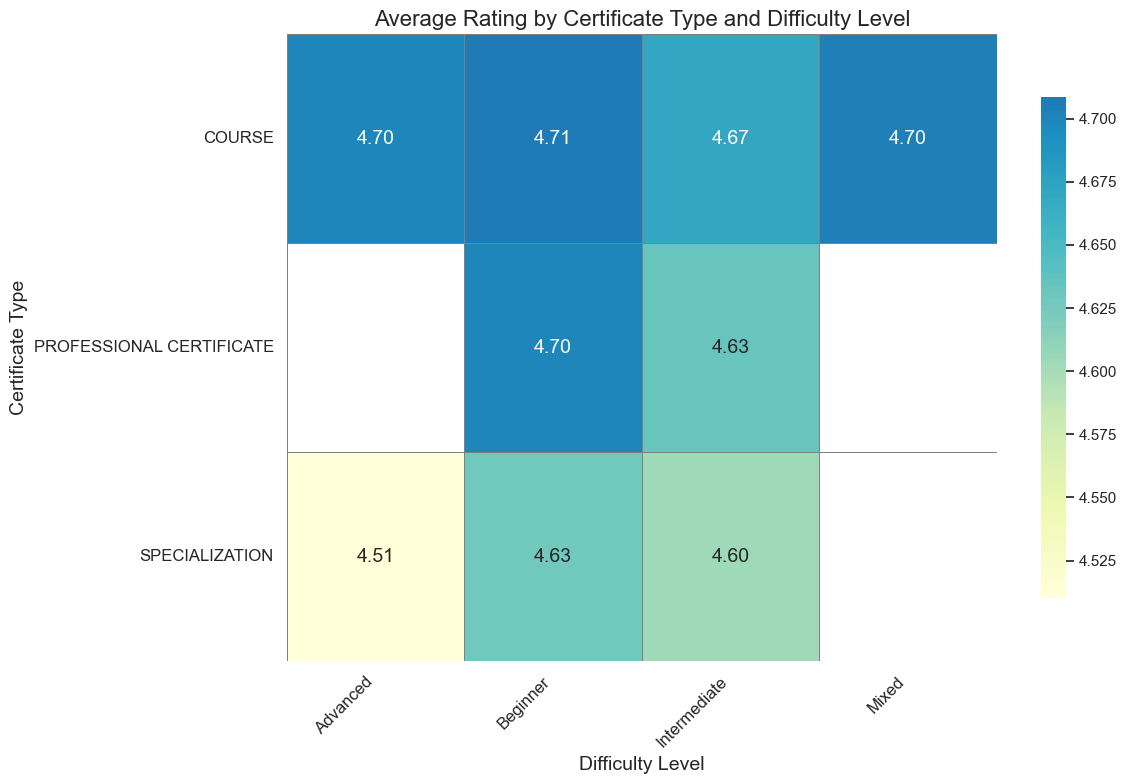

In [ ]:

rating_by_type_difficulty = course_data.groupby(['course_Certificate_type', 'course_difficulty']).course_rating.mean().unstack()


plt.figure(figsize=(12, 8))


sns.heatmap(
    rating_by_type_difficulty, 
    annot=True,                 
    cmap='YlGnBu',               
    fmt=".2f",                
    linewidths=0.5,             
    linecolor='gray',            
    annot_kws={"size": 14},     
    cbar_kws={'shrink': 0.8},    
    center=rating_by_type_difficulty.mean().mean()  
)


plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)


plt.title('Average Rating by Certificate Type and Difficulty Level', fontsize=16)
plt.xlabel('Difficulty Level', fontsize=14)
plt.ylabel('Certificate Type', fontsize=14)


plt.tight_layout()


plt.show()

# The correlation heatmap between number of students enrolled vs course rating

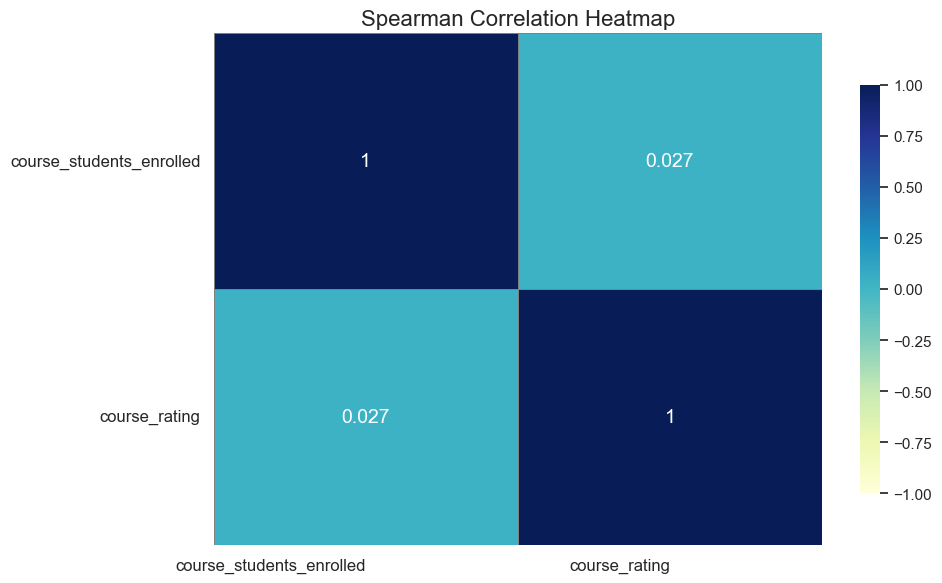

In [ ]:

numeric_columns = ['course_students_enrolled', 'course_rating']
correlation_matrix = course_data[numeric_columns].corr(method='spearman')


plt.figure(figsize=(10, 6))


sns.heatmap(
    correlation_matrix, 
    annot=True,               
    cmap='YlGnBu',            
    vmin=-1, vmax=1,          
    center=0,                 
    linewidths=0.5,          
    linecolor='gray',         
    annot_kws={"size": 14},  
    cbar_kws={'shrink': 0.8}   
)


plt.xticks(rotation=0, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)


plt.title('Spearman Correlation Heatmap', fontsize=16)


plt.tight_layout()  
plt.show()

Point: My correlattion interval ranging from -1 to 1 highlights that the correlation between the course_students_enrolled and the course rating are strongly correlated

## The Top 5 Organizations


In [ ]:

organization_performance = course_data.groupby('course_organization').agg(
    average_rating=('course_rating', 'mean'),
    total_enrollments=('course_students_enrolled', 'sum')
).reset_index()



In [30]:

top_5_by_enrollment = organization_performance.nlargest(5, 'total_enrollments')

/var/folders/rd/jz5wyqfd2f33y9td2_gm_r9w0000gn/T/ipykernel_53536/116184069.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_5_by_enrollment, x='course_organization', y='total_enrollments', palette='magma')


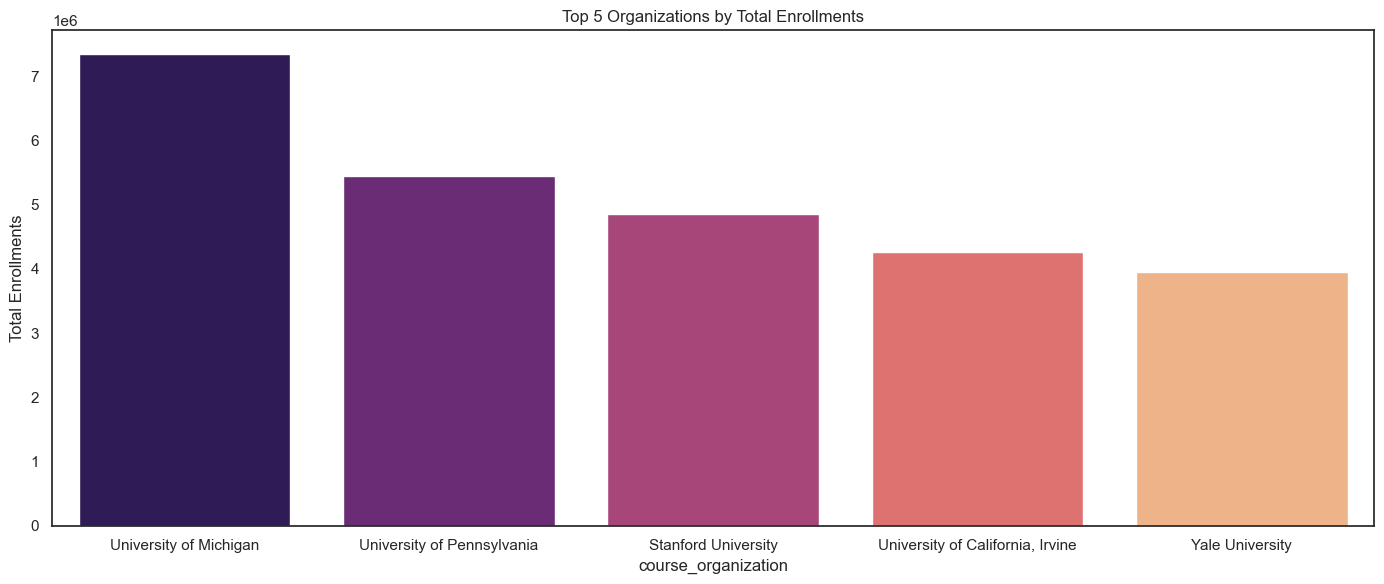

In [31]:

plt.figure(figsize=(14, 6))
sns.barplot(data=top_5_by_enrollment, x='course_organization', y='total_enrollments', palette='magma')
plt.title('Top 5 Organizations by Total Enrollments')
plt.xticks(rotation=0)
plt.ylabel('Total Enrollments')
plt.tight_layout()
plt.show()

Point : University of Michigan had the highest enrollment indicating that it might be the best performing or rather amongest the most affordable for many students

## Enrollment Distribution by Certificate Type
This bar chart can show the average or total enrollments across different types of certifications, providing insight into the popularity of certification types (e.g., Specialization vs. Course).

/var/folders/rd/jz5wyqfd2f33y9td2_gm_r9w0000gn/T/ipykernel_53536/2702175267.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=certificate_enrollment, x='course_Certificate_type', y='course_students_enrolled', palette='magma')


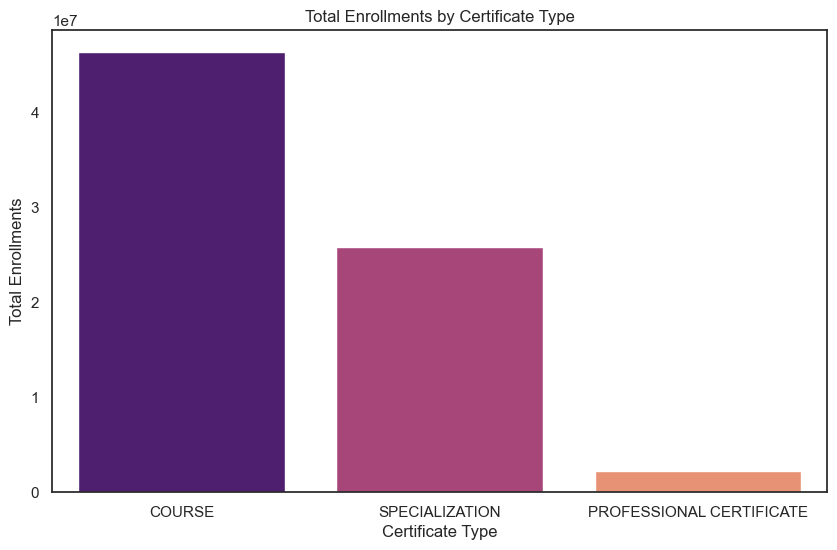

In [ ]:

certificate_enrollment = course_data.groupby('course_Certificate_type')['course_students_enrolled'].sum().reset_index()
certificate_enrollment = certificate_enrollment.sort_values(by='course_students_enrolled', ascending=False)


plt.figure(figsize=(10, 6))
sns.barplot(data=certificate_enrollment, x='course_Certificate_type', y='course_students_enrolled', palette='magma')
plt.title('Total Enrollments by Certificate Type')
plt.xlabel('Certificate Type')
plt.ylabel('Total Enrollments')
plt.show()

Point: Many stuxdents are enrolling for courses while few enroll for the professional certificates indicating that there is a gap in knowledge for many people are starters

## Top 10 Most Enrolled Courses
This bar chart can highlight the courses with the highest enrollment, showcasing which courses are most popular among students.

/var/folders/rd/jz5wyqfd2f33y9td2_gm_r9w0000gn/T/ipykernel_53536/843635226.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_courses, x='course_students_enrolled', y='course_title', palette='magma')


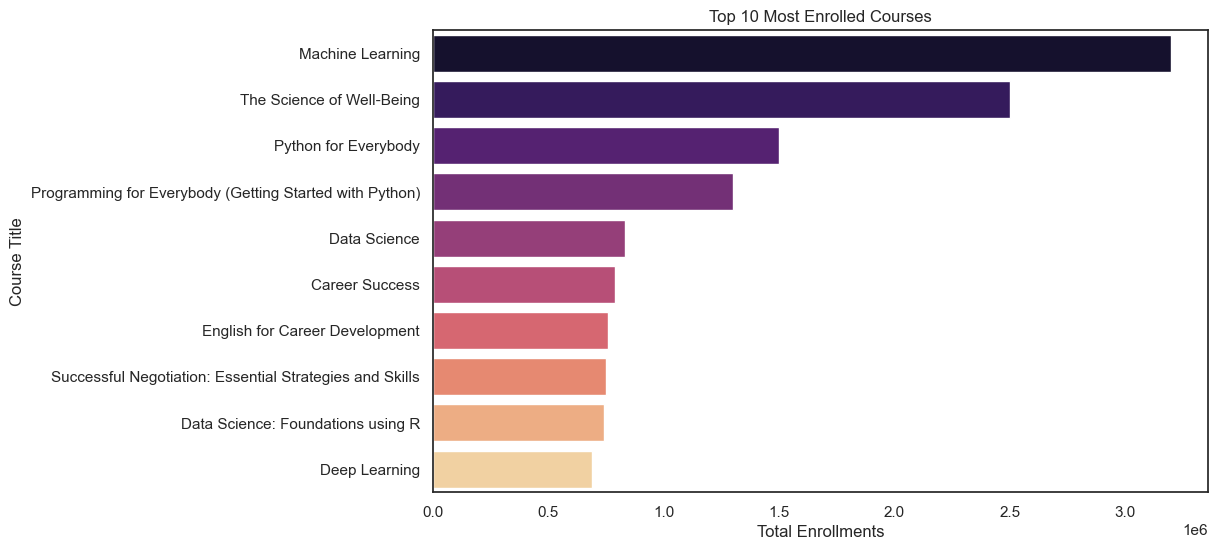

In [26]:
top_10_courses = course_data.nlargest(10, 'course_students_enrolled')
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_courses, x='course_students_enrolled', y='course_title', palette='magma')
plt.title('Top 10 Most Enrolled Courses')
plt.xlabel('Total Enrollments')
plt.ylabel('Course Title')
plt.show()


Point: This indicates that most people are techies and thus the choice of Tech courses

# Course Ratings Distribution by organization

This shows the distribution of course ratings across organizations, the impact of certificate types on student enrollment, and identifying the top 10 most popular courses by enrollment. 

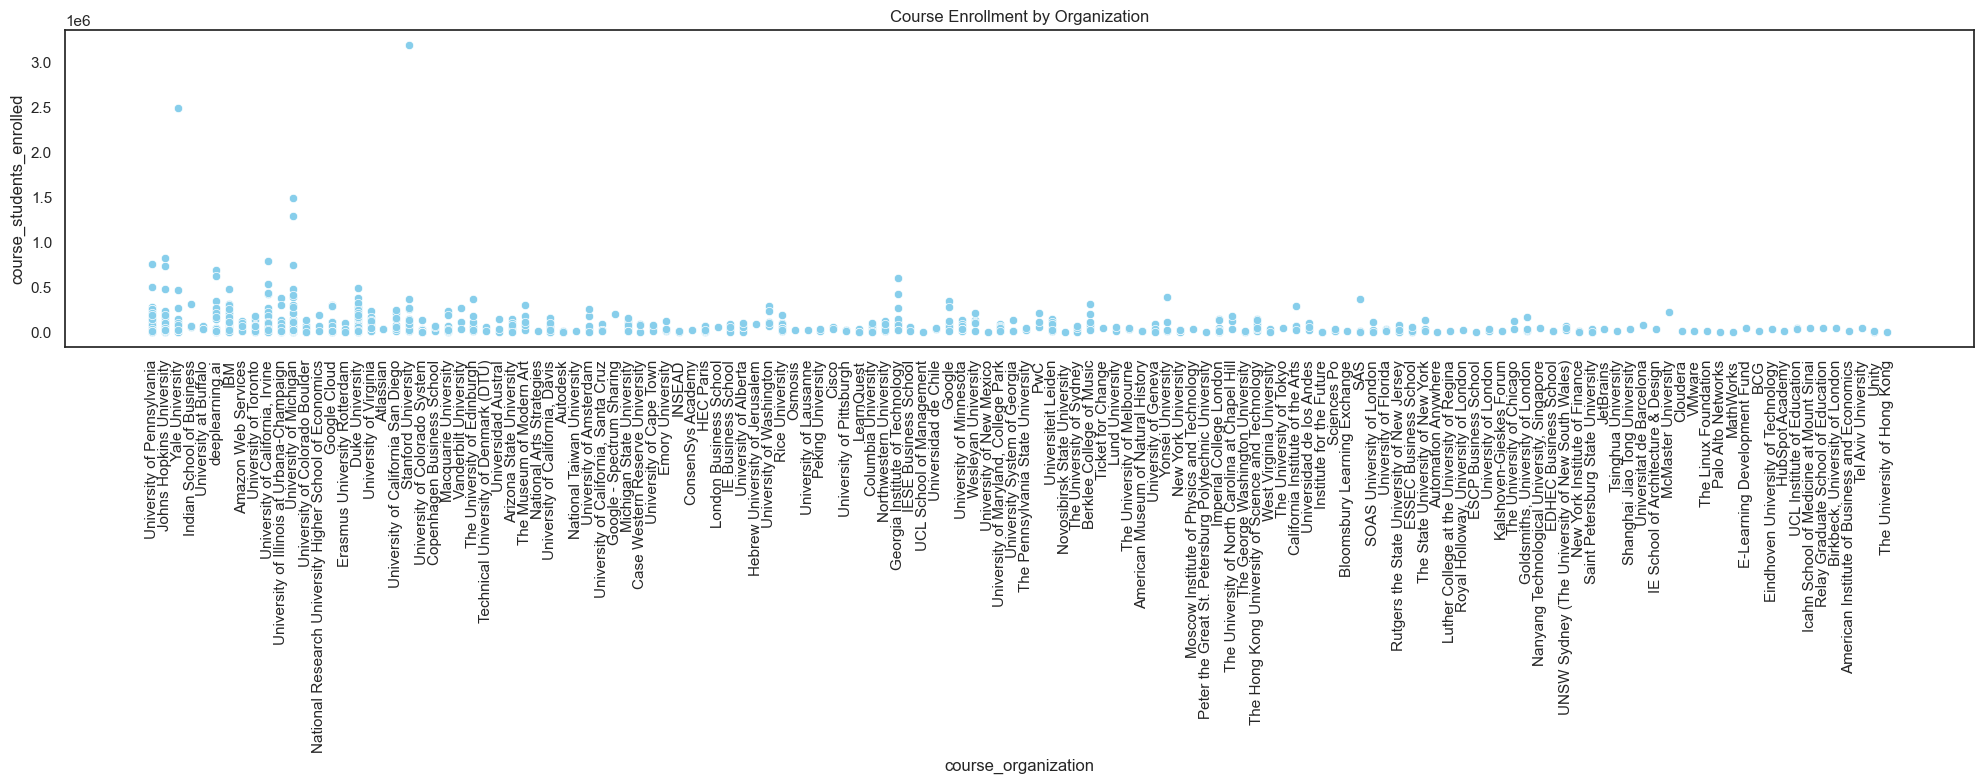

In [34]:

plt.figure(figsize=(20, 8))
sns.scatterplot(x='course_organization', y='course_students_enrolled', data=course_data, color='skyblue')

plt.xticks(rotation=90)
plt.title('Course Enrollment by Organization')
plt.tight_layout()
plt.show()

Point: We note that many organizations have zero enrolment of students which is a big pain point

# Findings

1. Many courses in coursera are taught in English and therfore this encourages intenational students to enroll
2. Many courses in coursera offered are of beginner level
3. The ratings of the schools are actually good, indicating learning is taking place and students are being satisfied with the mode of teaching
4. Many people are enrolling for the tech courses indicating a need to technology advancedment


# Recommendations
1. Organizations with low number of enrollements should benchmark the performing ones to see where they can change and become better
2. Professional certificates should be further discounted to allow amny people to uptake them
3. Courses with poor ratings should be looked at and improved